In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [27]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

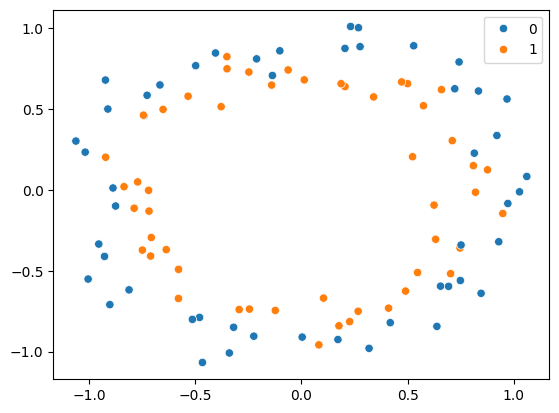

In [28]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=3500,validation_data=(x_test, y_test), verbose=0)

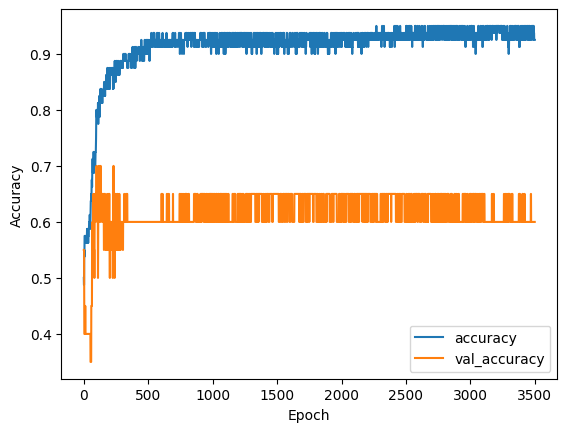

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

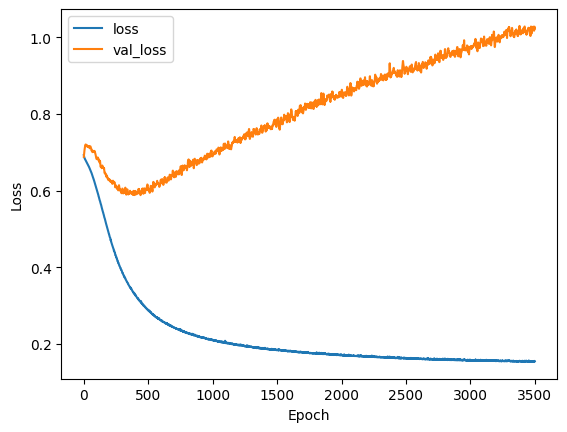

In [34]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 223us/step


<Axes: >

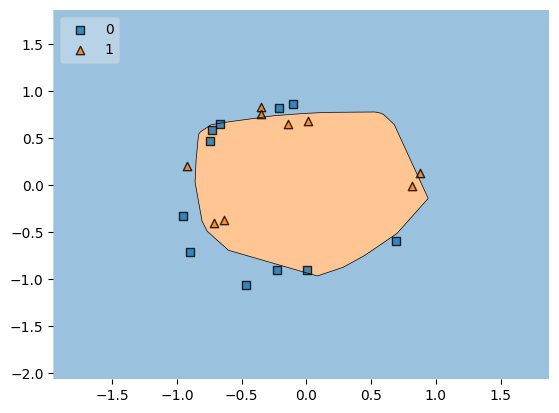

In [35]:
plot_decision_regions(x_test, y_test, clf=model, legend=2)

# Early Stopping

In [36]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    
)

In [44]:
history = model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test), verbose=0, callbacks=[callback])

Epoch 269: early stopping


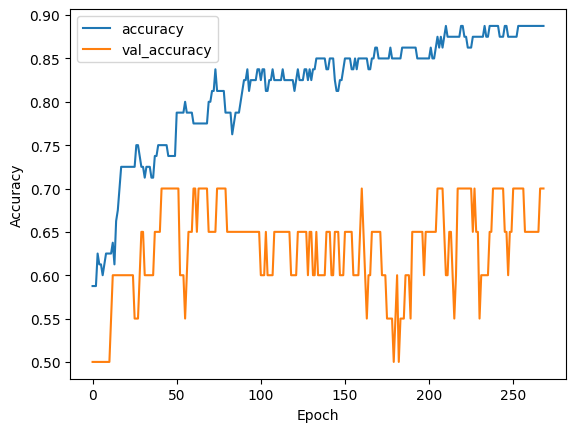

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

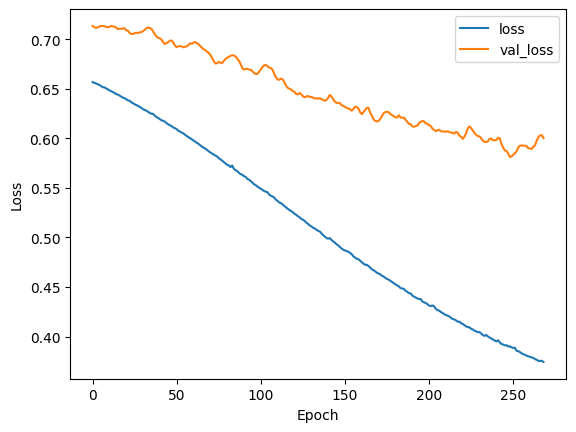

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 214us/step


<Axes: >

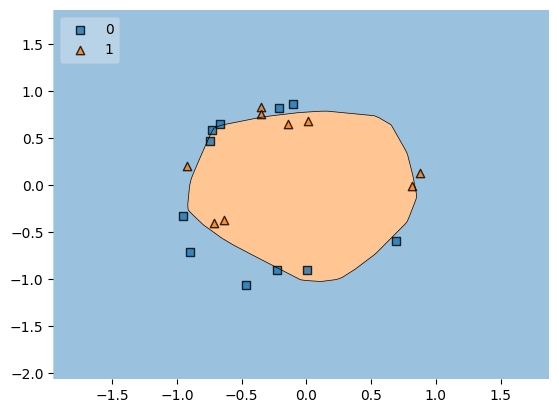

In [47]:
plot_decision_regions(x_test, y_test, clf=model, legend=2)